# Bank credit scoring

In this project, I will develop a Machine Learning model to help a bank decides if a **loan** should be granted or not using a supervised learning method using classification.
This is the **pipeline** used for this project:                         
>
**1.    Business understanding**
>
**2.    Data collection & understanding**
>
**3.    Data cleaning**
>
**4.    EDA - Exploratory Data Analysis**
>
**5.    Data pre-processing**
>
**6.    Modelling**
>
**7.    Evaluation**
>
**8.    Deployment**
>

 In this actual notebook, i will perform the steps 1-4, more focused on **Exploratory Data Analysis(EDA)**. In the other notebook I will work on steps 5-8 mode focused in **modelling**.
 
 - The main objective here is to understanding our dataset and get some insights about it. From there, we will have some understanding about our actual situation and what we should perform in the Dataset

## 1.0   -   Business Understanding

Follow this official description at the competition on [Kaggle](https://www.kaggle.com/c/GiveMeSomeCredit):  
>
"Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 
Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. "
- **1.1 Problem context**
-   Imagine you are a bank owner that recently opened this business. Among other banking problems (such as a management system, security system, etc.), you notice that your bank is offering loans to people who are not paying their debts properly.
In addition, employees are offering them credit limits that are far above normal when compared to their monthly income. 
So, you decide to hire a general team of Data Scientists/Machine learning who are offering a credit analysis system to decide if a loan should be granted or not. So, for now, you are the bank owner and I'm in the development team :). My team's task is to develop a model from the provided dataset and send it to another team to link the system itself to the model
- **Project objectives:**
- Build a model that has satisfactory accuracy in whether or not to offer loans correctly to customers
- Offer plans for the bank to reduce the 

In [1]:
import matplotlib.pyplot as plt # type: ignore
import  numpy as np# type: ignore
import  pandas as pd# type: ignore
import os
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import normalize# type: ignore
from sklearn.ensemble import RandomForestClassifier# type: ignore
from sklearn.metrics import accuracy_score# type: ignore
from sklearn.neighbors import KNeighborsClassifier# type: ignore
from sklearn import metrics# type: ignore
import seaborn as sns# type: ignore

from imblearn.over_sampling import RandomOverSampler# type: ignore
import random
import tensorflow as tf# type: ignore

sns.set_theme(style="ticks")
sns.set_palette("viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

## *2.0*  Data Collection & understanding

In [111]:
df_data= pd.read_csv(os.path.join('..','data', 'cs-training.csv'))
df_data.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Data dictionary:
-  **SeriousDlqin2yrs** : Person experienced 90 days past due delinquency or worse 
-  **RevolvingUtilizationOfUnsecuredLines** : 	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
-  **Age**:	Age of borrower in years
-  **NumberOfTime30-59DaysPastDueNotWorse**: (discarded):	Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
-  **DebtRatio**:	Monthly debt payments, alimony,living costs divided by monthy gross income
-  **MonthlyIncome**:	Monthly income
-  **NumberOfOpenCreditLinesAndLoans**:	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
-  **NumberOfTimes90DaysLate**:	Number of times borrower has been 90 days or more past due.
-  **NumberRealEstateLoansOrLines**:	Number of mortgage and real estate loans including home equity lines of credit
-  **NumberOfTime60-89DaysPastDueNotWorse**:	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
-  **NumberOfDependents**:	Number of dependents in family excluding themselves (spouse, children etc.)

In [112]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


###  Data Types

In [113]:
df_data.info()      #note Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Check NA

In [114]:
df_data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

#### Check duplicates

In [115]:
df_data.duplicated().sum()

0

## 3.0 - DATA CLEANING

### 3.1 FEATURE ENGINEERING

> This specific dataset already has each feature almost properly categorized (in raw tasks we will hardly find datasets like this). Therefore, tasks with Label Encoder can already be found

In [116]:
df_data.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)



In [118]:
#dropping rows that contain NA values
df_data.dropna(inplace=True)

#### Outliers


In [119]:
df_data= df_data[df_data['age'] >=18 ]

df_data= df_data[df_data['NumberOfTime30-59DaysPastDueNotWorse']<96  ]

df_data= df_data[df_data['balance_divided_creditlimit']<=1]


####  SPLITTING THE DATA

In [120]:
# Defining X and Y
garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]
X_train, X_test, y_train, y_test = train_test_split( df_data.drop(garbage_columns, axis=1), df_data["SeriousDlqin2yrs"], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(93877, 9) (23470, 9) (93877,) (23470,)


In [121]:
X_train.head()

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
15378,0.103504,30,0.377924,3034.0,4,0,1,0,0.0
42977,0.029107,84,0.010663,3000.0,9,0,0,0,0.0
123209,0.477672,31,0.114401,7700.0,11,0,0,0,1.0
18038,0.071339,40,0.435328,6300.0,15,0,2,0,0.0
14385,0.629397,40,0.467870,11250.0,12,0,1,0,2.0


In [76]:
X_train.iloc[:, 0][X_train.iloc[:, 0]<50]
def labeling(X):
    if X<15:
        return 0
    elif 30>X>=15:
        return 1
    elif 100>X>=30:
        return 2
    elif 200>X>=100:
        return 3
    else: 
        return 4
    
X_train['MonthlyIncome'].apply(labeling).value_counts()

MonthlyIncome
4    94111
0     1788
3       46
2       14
1        4
Name: count, dtype: int64

In [77]:
###############################################################
X_train['MonthlyIncome'].apply(lambda x: 0 if 0 <= x < 10000 else (1 if 10000 <= x < 20000 else (2 if 20000 <= x < 30000 else 3))).value_counts()


MonthlyIncome
0    80196
1    13923
2     1157
3      687
Name: count, dtype: int64

####  Checking the targets 

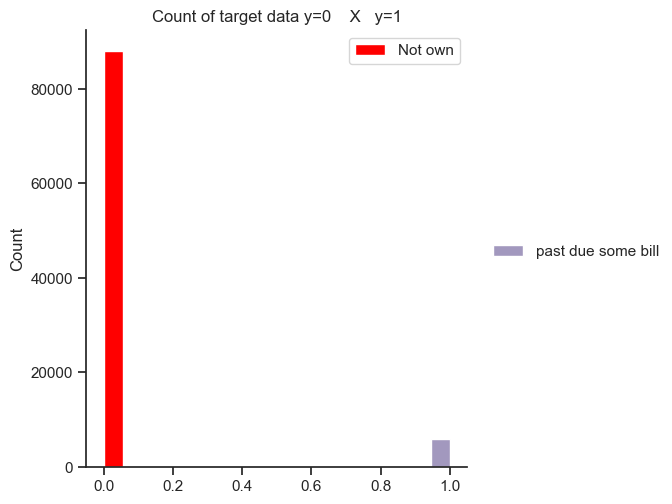

In [122]:
parta_data= pd.DataFrame({'past due some bill': y_train.values})
g= sns.displot(parta_data)
bars = g.ax.patches
bars[0].set_facecolor('red')
plt.legend(['Not own'])
plt.title('Count of target data y=0    X   y=1')

plt.show()


In [123]:
def overSampling(X, y):

    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    return X_resampled, y_resampled



X_train, y_train = overSampling(X_train, y_train)
X_test, y_test= overSampling(X_test, y_test)

y_counts= y_train.value_counts()
resampledDf= pd.DataFrame({'CLASS 0': y_counts[0], 'CLASS 1': y_counts[1]}, index=['QUANTITY EACH CLASS'])
resampledDf

,CLASS 0,CLASS 1
QUANTITY EACH CLASS,88065,88065


## 4.0  EDA - Exploratory Data Analysis

#### 4.1   -   General plots

array([[<Axes: title={'center': 'balance_divided_creditlimit'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'DebtRatio'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>],
       [<Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'number_times_latepay60-89'}>,
        <Axes: title={'center': 'NumberOfDependents'}>]], dtype=object)

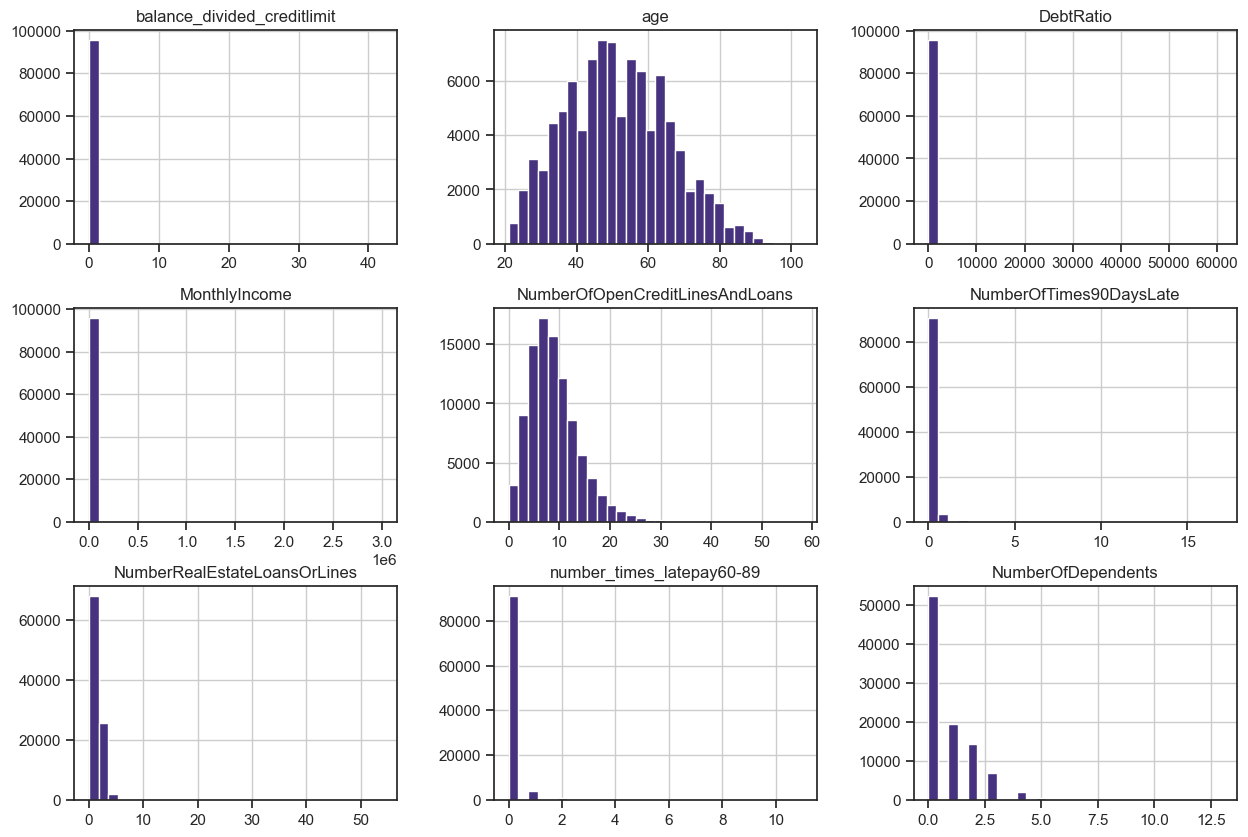

In [85]:
X_train[:].hist(figsize=(15,10), bins=30)

##### Informations we can extract from above:
- The dataset has some values that are extremely high comparing to the others (please check example below )
- Between 40-60 years old, we have the highest peak of people registration
- The most records of borrowers haven't been in past due situation in the last 2 years (60-89 days or 90+ )

In [28]:
pd.DataFrame(X_train['MonthlyIncome'].value_counts().sort_index())

#The first is the lowest record of monthly income and the last is the HIGHER

,count
MonthlyIncome,
0.0,1288
1.0,470
2.0,6
4.0,2
5.0,2
...,...
730483.0,1
835040.0,1
1072500.0,1


#### 4.2 - Correlation heat map using Pearson method

<Axes: >

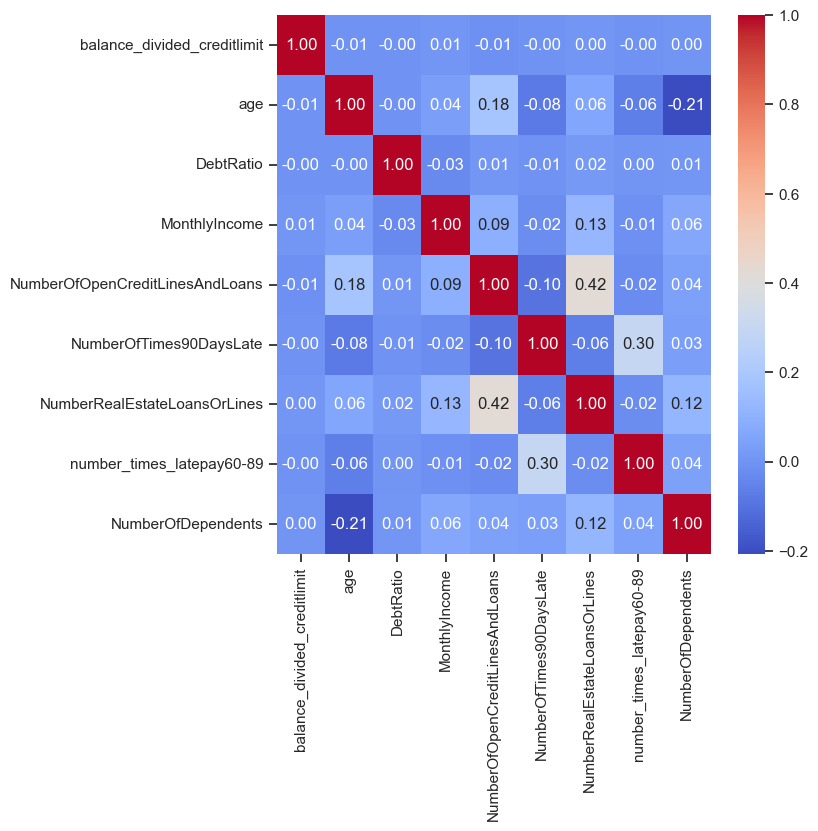

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(X_train.corr(method='pearson'), annot=True, cmap='coolwarm',  fmt='.2f')
#Detecting correlations

##### Here we can see some insights:
- NumberOfTimes90DaysLate has some correlation with number_times_latepay60-89 and you can understand this thinking that they are essentialy the same feature, but with different metrics (days related)
- The Age of the borrower have no correlation compared to the NumberOfDependents (-0.21)
- NumberRealEstateLoansOrLines have the greatest correlation in the heatmap while in pair with NumberOfOpenCreditLinesAndLoans

##### 4.2.1 Vizualizing sort of correlations betweeen features

Text(0.5, 1.0, 'Bad Correlation')

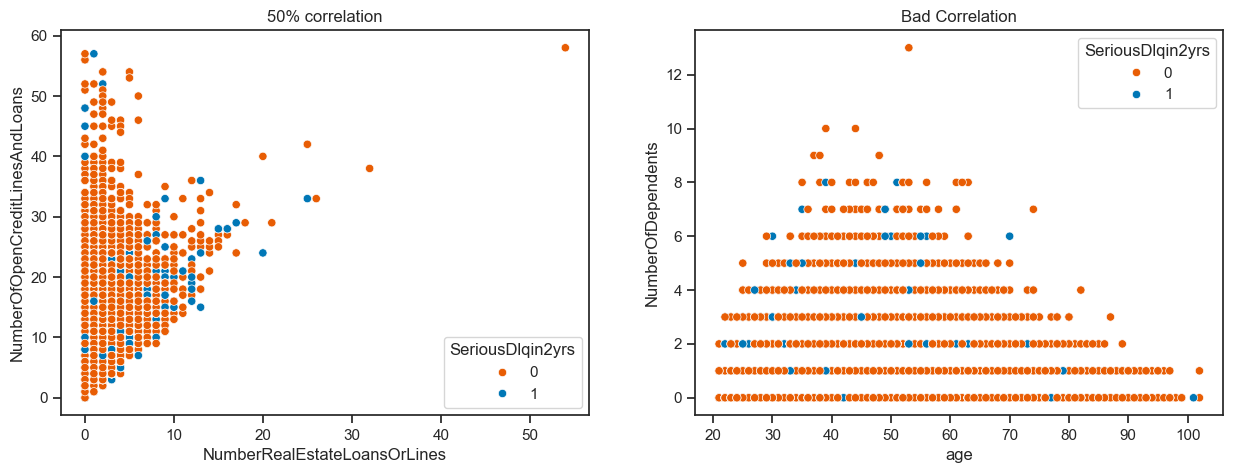

In [42]:
colors = sns.color_palette(['#e85d04', '#0077b6'])
fig, axs =plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=X_train['NumberRealEstateLoansOrLines'], y=X_train['NumberOfOpenCreditLinesAndLoans'],ax=axs[0], hue=y_train, palette=colors)
axs[0].set_title('0.42 correlation')
sns.scatterplot(x=X_train['age'], y=X_train['NumberOfDependents'],ax=axs[1], hue=y_train, palette=colors)
axs[1].set_title('Bad Correlation')


#### 4.3   -   Debt Ratio ㅤ       X       ㅤ Age

-   Young people seems to has less free money than olders

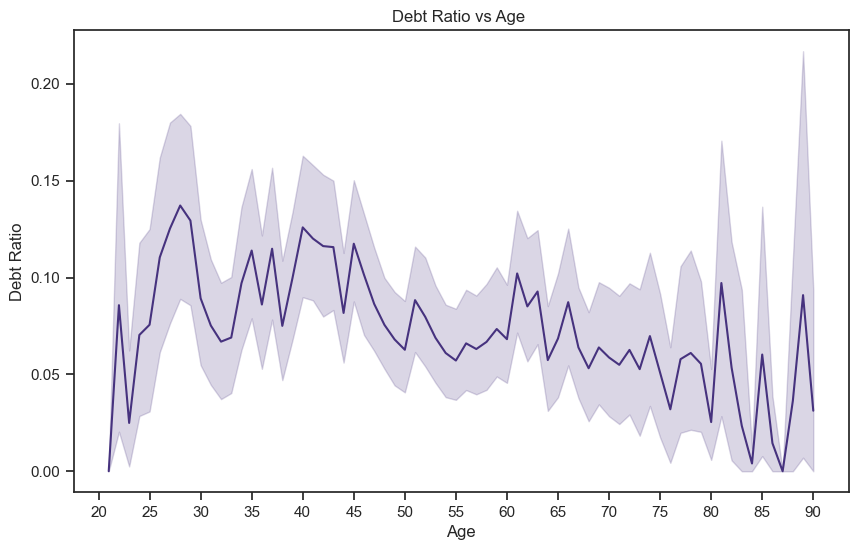

In [43]:
def debtDivided(value):
    if value >=0 and value<25:
        return 0   
    if  value>= 25.0 and value<50.0:
        return 1
    elif value >= 50.0 and value < 100.0:
        return 2
    elif value >=100 and value < 150.0:
        return 3
    elif value>=150 and value <200:
        return  4
    elif value>=200 and value <400:
        return 5
    else:
        return 6
    
particioned_data_2= X_train.iloc[:,2].apply(debtDivided)


particioned_data_2= pd.DataFrame(particioned_data_2)
particioned_data_2['Age']= X_train.iloc[:, 1]
particioned_data_2= particioned_data_2[particioned_data_2['Age'] <=90]      #removing extreme cases for better vizualization only



plt.figure(figsize=(10, 6))
sns.lineplot(data=particioned_data_2, x='Age', y='DebtRatio')

plt.xlabel('Age')
plt.ylabel('Debt Ratio')
plt.title('Debt Ratio vs Age ')
plt.xticks(np.arange(20, 95, 5))
plt.show()


#### 4.4       -       Past due    ㅤ    X   ㅤ    Number of dependents
-  Quantity of number of dependents of people that past due = 1  ㅤ   Xㅤ   past due = 0

Text(0.5, 1.0, 'Number_dependents when pastdue = 0')

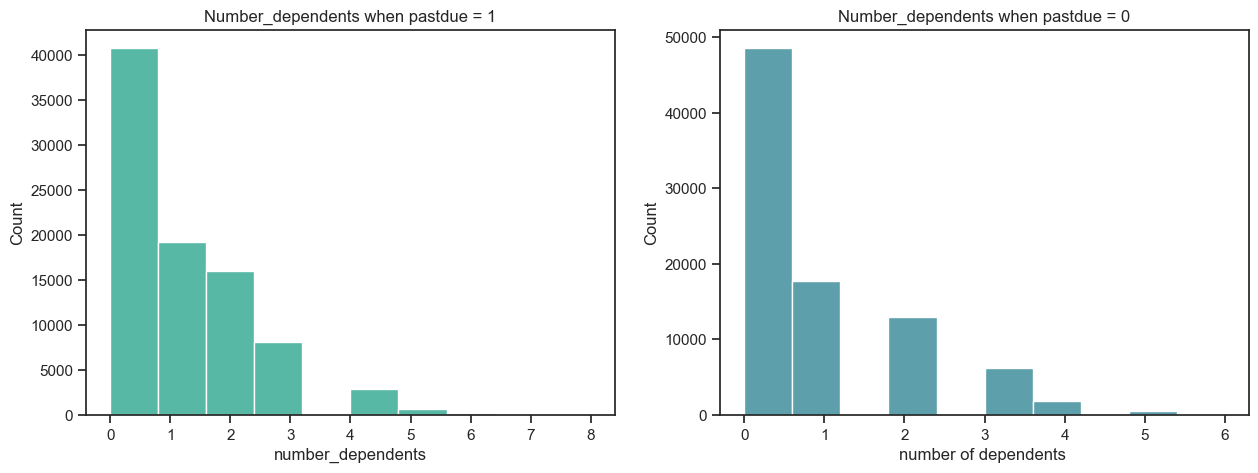

In [143]:
duedependents= pd.DataFrame()
due_to_0=      pd.DataFrame()
duedependents['number_dependents=1']= X_train.iloc[:, 8][y_train==1]
due_to_0['number_dependents_0']= X_train.iloc[:, 8][y_train==0]


colors = sns.color_palette('viridis')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(duedependents['number_dependents=1'], ax=axs[0],bins=10, color=colors[3])
axs[0].set_xlabel('number_dependents')
axs[0].set_title('Number_dependents when pastdue = 1')


sns.histplot(due_to_0['number_dependents_0'], ax=axs[1], binrange=(0,6), bins=10, color=colors[2])
axs[1].set_xlabel('number of dependents ')
axs[1].set_title('Number_dependents when pastdue = 0')


#### 4.5       Balance of credit limit ÷ sum of credit limit       ㅤX        ㅤPast due

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_4980\230664482.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors[2:])


Text(0.5, 1.0, 'Balance÷sum creditlimit  X   Past due ')

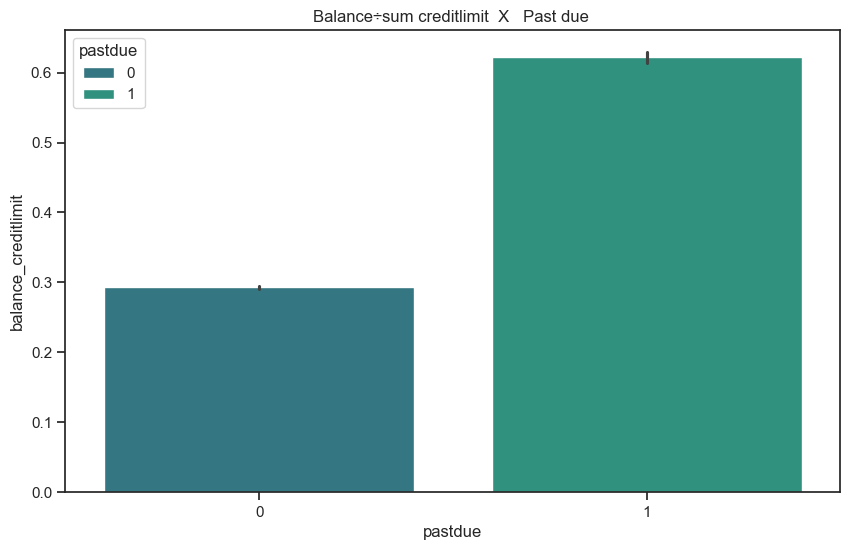

In [144]:
balancedue= pd.DataFrame()
balancedue['balance_creditlimit'] = df_data.iloc[:, 2]
balancedue['pastdue']= df_data.iloc[:, 1]
balancedue=balancedue.sort_index()


plt.figure(figsize=(10,6))
sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors[2:])
plt.title('Balance÷sum creditlimit  X   Past due ')

##### Description:
- The chart compares the median revolving utilization of unsecured lines of credit between borrowers with past defaults (Y=1) and those without defaults (Y=0)
>
What that means?  The people who are with past due delinquency (y=0) have higher balance compared with the sum of the credit limit. This could be a reason:
 People with pastdue = 1 are active users of credit limit and they are owing payment over a long period of time. As a result, interest rates and rates are rising
>
So, from the division equation represented by this Feature, we have that the denominator has to be > 0 and > Total Balance. 
>
- As the TotalBalance decrease, the overall value are getting down until 0 (no balance available)
> 
- Conversely, as the TotalBalance increases, the overall value also increases until it reaches the value of the denominator. PS: you can't have more than what is available in your account
>
$$
\frac{Total Balance}{Sum Of Credit Limits}
$$



### 4.6   -    Number of times people past due in last 2 years      ㅤX          ㅤCurrently has bills that are at least 90 days past due
> This can be considered a high valueable information, please check section 5.2

In [151]:
colors

[(0.288921, 0.758394, 0.428426),
 (0.122312, 0.633153, 0.530398),
 (0.153364, 0.497, 0.557724),
 (0.212395, 0.359683, 0.55171),
 (0.275191, 0.194905, 0.496005),
 (0.626579, 0.854645, 0.223353)]

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_4980\3859194030.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(df_recurring, x='pastdue', y='NumberOfTimes90DaysLate', ax= axs[0], hue='pastdue', palette=colors)


Text(0.5, 1.0, 'Number of times latepay 60-89 days  X   Past due in last 2 years')

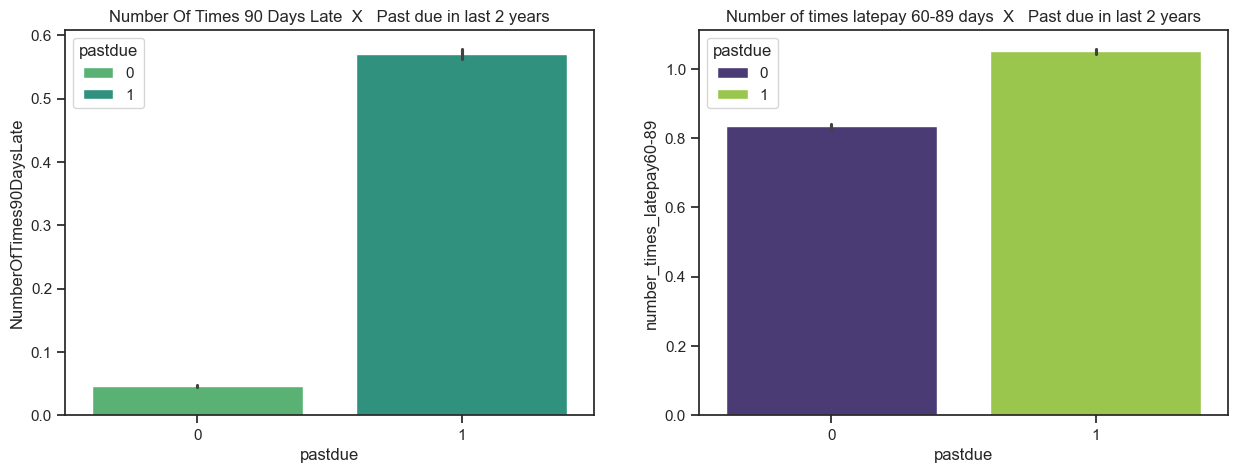

In [156]:

df_recurring= pd.DataFrame()
df_recurring['NumberOfTimes90DaysLate']= X_train['NumberOfTimes90DaysLate']
df_recurring['pastdue']= y_train
df_recurring['number_times_latepay60-89']= X_train.iloc[:, 8]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(df_recurring, x='pastdue', y='NumberOfTimes90DaysLate', ax= axs[0], hue='pastdue', palette=colors)
axs[0].set_title('Number Of Times 90 Days Late  X   Past due in last 2 years')
sns.barplot(df_recurring, x='pastdue', y='number_times_latepay60-89', ax= axs[1], hue='pastdue', palette=colors[4:])
axs[1].set_title('Number of times latepay 60-89 days  X   Past due in last 2 years')

##### Description:
- The median of the people who have past default (y=1) are extremely larger than from people who Y=0.
>
This is very valuable information, as we can see that borrowers who have overdue bills have had bills that are 60 days or more past due **in the last 2 years**. So a borrower probably have **overdue bills in the past**


#### 4.7   -    Have people who have income less than 5000 owed any bills that has been expired for at least 90 days in the last two years?     


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_11360\2063580838.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_11360\2063580838.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]


Text(0, 0.5, 'Count')

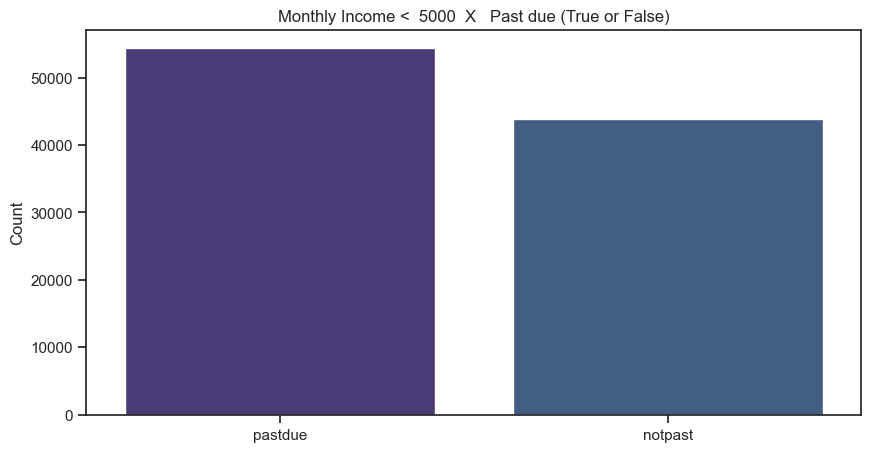

In [21]:

notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]
income_past= pd.DataFrame({'pastdue': past, 'notpast': notpast}, index=['quantity'])
plt.figure(figsize=(10,5))
sns.barplot(income_past)
plt.title('Monthly Income <  5000  X   Past due (True or False)')
plt.ylabel('Count')


## 5.0 DATA PRE-PROCESSING

#### 5.1 - Changing data type

In [36]:
columns_type= ['NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'number_times_latepay60-89',
       'NumberOfDependents']

X_train[columns_type] = X_train[columns_type].astype(np.int16)
y_train = y_train.astype(np.int8)
X_train['age'] = X_train['age'].astype(np.int8)


X_test[columns_type] = X_test[columns_type].astype(np.int16)
y_test = y_test.astype(np.int8)
X_test['age'] = X_test['age'].astype(np.int8)
pd.DataFrame(X_train.dtypes)


# Note we are reducing the bits usage of the features looking for a better perfomance. Some features as 'Age' doesn't need any bigger type than int8


,0
balance_divided_creditlimit,float64
age,int8
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int16
NumberOfTimes90DaysLate,int16
NumberRealEstateLoansOrLines,int16
number_times_latepay60-89,int16
NumberOfDependents,int16


#### 5.2 -   Normalization

In [37]:

real_columns= X_train.columns
X_train= pd.DataFrame(normalize(X_train), columns=real_columns)
X_test = pd.DataFrame(normalize(X_test), columns=real_columns)
X_test

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,1.513451e-08,0.002360,0.000005,0.999997,0.000640,0.000000,0.000080,0.0,0.000000
1,0.000000e+00,0.003091,0.000015,0.999995,0.000412,0.000000,0.000069,0.0,0.000069
2,3.074909e-04,0.020240,0.000166,0.999793,0.001687,0.000000,0.000422,0.0,0.000843
3,0.000000e+00,0.004397,0.000017,0.999990,0.000684,0.000000,0.000098,0.0,0.000098
4,4.757110e-06,0.008705,0.000044,0.999961,0.001596,0.000000,0.000145,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
44837,2.686495e-04,0.018330,0.000139,0.999819,0.004999,0.000000,0.000000,0.0,0.000000
44838,5.516826e-04,0.026481,0.000011,0.999649,0.000000,0.000552,0.000000,0.0,0.000000
44839,7.402333e-06,0.002917,0.000028,0.999995,0.000750,0.000000,0.000083,0.0,0.000000
44840,2.802414e-04,0.014012,0.000100,0.999901,0.000560,0.000280,0.000280,0.0,0.000560


## 6.0 - Model Training

In [46]:
models_accuracy

,KNN,RForest,SVM,Neural Network


#### 6.1 -  KNN Classifier

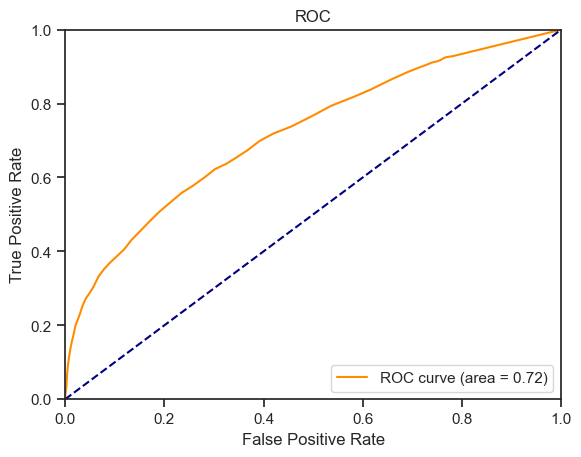

0.6602738504080995

In [45]:
models_accuracy = pd.DataFrame(columns=['KNN', 'RForest', 'SVM', 'Neural Network' ])
knn = KNeighborsClassifier(n_neighbors=50).fit(X_train, y_train)
y_knn_n = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_knn_n)



y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_knn)
roc_auc = metrics.roc_auc_score(y_test, y_prob_knn)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
accuracy_knn


#### 6.2 -  Random Florest Classifier

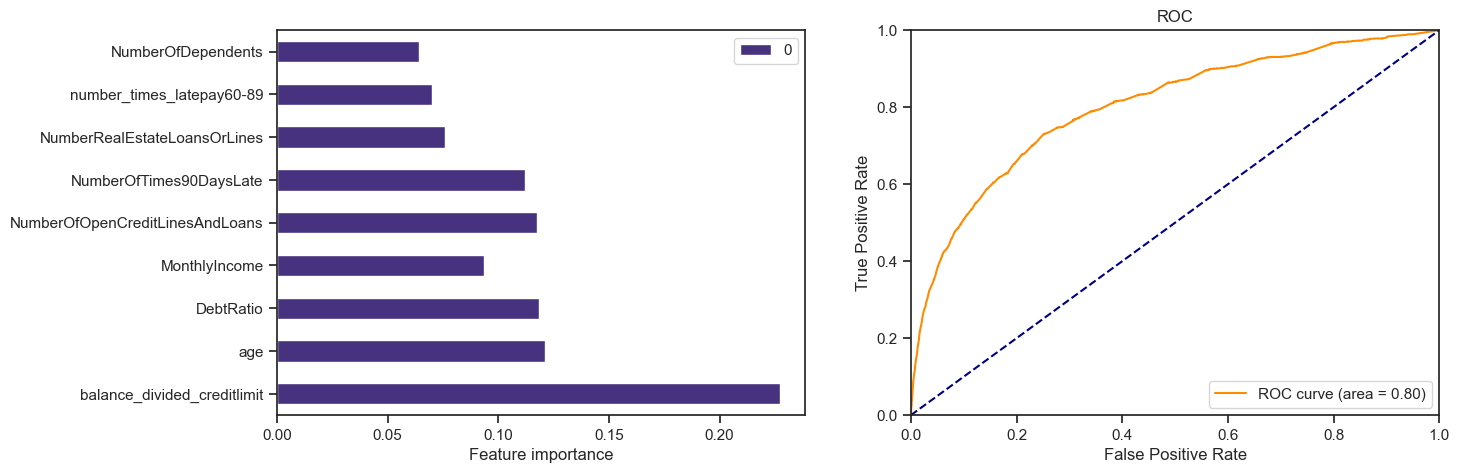

In [47]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
y_RFC= forest.predict(X_test)
accuracy_RFC= accuracy_score(y_test, y_RFC)

#Feature importance
importance = forest.feature_importances_
global_importances = pd.DataFrame(importance, index=X_train.columns)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))



#ROC GRAPH
y_pred_prob = forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
global_importances.plot.barh(ax=axs[0])
axs[0].set_xlabel('Feature importance')
axs[1].plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.0])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC')
axs[1].legend(loc="lower right")

plt.show()


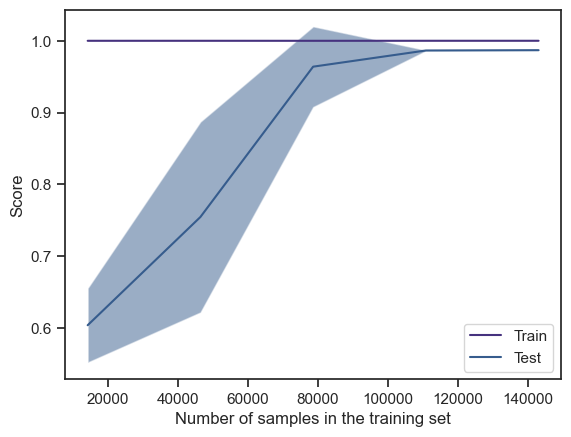

In [39]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    forest, X_train, y_train)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

#### 6.5 -  Neural networks

In [51]:
model =tf.keras.Sequential(
[tf.keras.layers.Input(shape=(9,)),
 tf.keras.layers.Dense(units=50, activation='relu', ),
 tf.keras.layers.Dense(units=100, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(units=50, activation='relu', ),
 tf.keras.layers.Dense(units=1, activation='sigmoid', )
]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 4s 536us/step - accuracy: 0.5006 - loss: 6.1817
Epoch 2/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 537us/step - accuracy: 0.4983 - loss: 0.7784
Epoch 3/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 535us/step - accuracy: 0.5002 - loss: 0.6934
Epoch 4/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step - accuracy: 0.4998 - loss: 0.6934
Epoch 5/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 545us/step - accuracy: 0.5014 - loss: 0.6934


In [47]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 50)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,105 (125.41 KB)

 Trainable params: 10,701 (41.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,404 (83.61 KB)

In [27]:
y_nn=model.predict(X_test)

acc_NN= accuracy_score(y_test, y_nn )
print(f"Model Accuracy: {acc_NN}")

1400/1400 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step


0.5054265297007593

In [ ]:
def app(value):
    if value.argmax() == 0:
        return 0
    elif value.argmax() == 1:
        return 1
listest= []
for i in yhat_knn_new:

    listest.append(app(i))

acc_teste= np.array(listest)

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
print(y_test_rsld.shape)
from sklearn.metrics import accuracy_score


accuracy_score(y_test_rsld, acc_teste)

(44858,)


0.6631593026884837